<a href="https://colab.research.google.com/github/Roee16/ta/blob/master/eda_ta35_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HistoricalPrices_TA35.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close
0,02/12/24,1829.41,1842.94,1829.41,1842.94
1,02/11/24,1818.88,1827.36,1813.60,1820.37
2,02/08/24,1832.13,1838.71,1824.94,1831.55
3,02/07/24,1836.67,1850.04,1835.20,1841.57
4,02/06/24,1819.23,1844.50,1818.78,1837.41


In [4]:
# prompt:

# Get the number of rows and columns
number_rows = df.shape[0]
number_columns = df.shape[1]

# Get the column names
column_names = df.columns

# Get the data types of each column
data_types = df.dtypes

# Print the information
print("Number of rows:", number_rows)
print("Number of columns:", number_columns)
print("Column names:", column_names)
print("Data types:", data_types)


Number of rows: 3550
Number of columns: 5
Column names: Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')
Data types: Date       object
 Open     float64
 High     float64
 Low      float64
 Close    float64
dtype: object


In [5]:
# prompt: Using dataframe df:

import pandas as pd
# Convert the "Date" column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])


In [27]:
df.min().year
# df.index.min().year

2009

In [51]:
from pandas.tseries.holiday import USFederalHolidayCalendar

In [53]:
cal = USFederalHolidayCalendar()    # US calendar
hol = cal.holidays(start=df.Date.min(), end=df.Date.max())    # US holidays

In [55]:
df['isHoliday'] = df.Date.isin(hol)

In [56]:
df

,Date,Open,High,Low,Close,Year,year,month,week_number,Day_of_Week,daily_diff,is_inter_day_profit,is_close_consecutive_days_profit,is_us_hol,is_il_hol,isHoliday
0,2024-02-12,1829.41,1842.94,1829.41,1842.94,2024,2024,2,7,0,13.53,1,0,False,False,False
1,2024-02-11,1818.88,1827.36,1813.60,1820.37,2024,2024,2,6,6,1.49,1,0,False,False,False
2,2024-02-08,1832.13,1838.71,1824.94,1831.55,2024,2024,2,6,3,-0.58,0,1,False,False,False
3,2024-02-07,1836.67,1850.04,1835.20,1841.57,2024,2024,2,6,2,4.90,1,1,False,False,False
4,2024-02-06,1819.23,1844.50,1818.78,1837.41,2024,2024,2,6,1,18.18,1,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,2009-09-07,965.98,965.98,965.98,965.98,2009,2009,9,37,0,0.00,0,0,False,False,True
3546,2009-09-06,969.65,969.65,969.65,969.65,2009,2009,9,36,6,0.00,0,1,False,False,False
3547,2009-09-03,969.65,969.65,969.65,969.65,2009,2009,9,36,3,0.00,0,0,False,False,False
3548,2009-09-02,949.49,949.49,949.49,949.49,2009,2009,9,36,2,0.00,0,0,False,False,False


In [25]:
import holidays
# Detect US holidays
us_hldys = holidays.country_holidays('US')
il_hldys = holidays.country_holidays('IL')

In [58]:
us_hldys

holidays.country_holidays('US')

In [28]:
us_hol = pd.Series(holidays.country_holidays('US',  years=range(df.min().year,
                                                             df.max().year+1)))

In [38]:
us_hol.sort_index()

2009-01-01                 New Year's Day
2009-01-19     Martin Luther King Jr. Day
2009-02-16          Washington's Birthday
2009-05-25                   Memorial Day
2009-07-03    Independence Day (observed)
                         ...             
2024-09-02                      Labor Day
2024-10-14                   Columbus Day
2024-11-11                   Veterans Day
2024-11-28                   Thanksgiving
2024-12-25                  Christmas Day
Length: 185, dtype: object

In [29]:
il_hol = pd.Series(holidays.country_holidays('IL',  years=range(df.min().year,
                                                             df.max().year+1)))

In [59]:
il_hol

Index([2016-10-03, 2016-10-04, 2016-10-12, 2016-10-17, 2016-10-24, 2016-04-23,
       2016-04-29, 2016-05-12, 2016-06-12, 2017-09-21,
       ...
       2014-06-04, 2015-09-14, 2015-09-15, 2015-09-23, 2015-09-28, 2015-10-05,
       2015-04-04, 2015-04-10, 2015-04-23, 2015-05-24],
      dtype='object', length=144)

In [37]:
il_hol.sort_index()

2009-04-09                             Pesach
2009-04-15              Seventh day of Pesach
2009-04-29                   Independence Day
2009-05-29                            Shavuot
2009-09-19                      Rosh Hashanah
                           ...               
2024-10-03                      Rosh Hashanah
2024-10-04                      Rosh Hashanah
2024-10-12                         Yom Kippur
2024-10-17                             Sukkot
2024-10-24    Simchat Torah / Shemini Atzeret
Length: 144, dtype: object

,Date,Open,High,Low,Close,Year,year,month,week_number,Day_of_Week,daily_diff,is_inter_day_profit,is_close_consecutive_days_profit,is_us_hol,is_il_hol,isHoliday
20,2024-01-15,1861.79,1862.97,1847.76,1848.05,2024,2024,1,3,0,-13.74,0,1,True,False,True
30,2024-01-01,1870.40,1895.16,1869.02,1895.16,2024,2024,1,1,0,24.76,1,1,True,False,True
35,2023-12-25,1847.58,1867.00,1847.58,1867.00,2023,2023,12,52,0,19.42,1,1,True,False,True
57,2023-11-23,1791.19,1801.79,1778.22,1797.16,2023,2023,11,47,3,5.97,1,0,True,False,True
90,2023-10-09,1711.06,1737.31,1689.98,1728.49,2023,2023,10,41,0,17.43,1,0,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,2010-01-18,1156.10,1159.23,1159.23,1159.23,2010,2010,1,3,0,3.13,1,1,True,False,True
3490,2009-11-26,1093.82,1078.88,1078.88,1078.88,2009,2009,11,48,3,-14.94,0,0,True,False,True
3501,2009-11-11,1051.31,1055.03,1055.03,1055.03,2009,2009,11,46,2,3.72,1,0,True,False,True
3523,2009-10-12,1030.08,1038.12,1038.12,1038.12,2009,2009,10,42,0,8.04,1,1,True,False,True


In [67]:
il_hol.index

Index([2016-10-03, 2016-10-04, 2016-10-12, 2016-10-17, 2016-10-24, 2016-04-23,
       2016-04-29, 2016-05-12, 2016-06-12, 2017-09-21,
       ...
       2014-06-04, 2015-09-14, 2015-09-15, 2015-09-23, 2015-09-28, 2015-10-05,
       2015-04-04, 2015-04-10, 2015-04-23, 2015-05-24],
      dtype='object', length=144)

In [69]:
il_hol.sort_index()

2009-04-09                             Pesach
2009-04-15              Seventh day of Pesach
2009-04-29                   Independence Day
2009-05-29                            Shavuot
2009-09-19                      Rosh Hashanah
                           ...               
2024-10-03                      Rosh Hashanah
2024-10-04                      Rosh Hashanah
2024-10-12                         Yom Kippur
2024-10-17                             Sukkot
2024-10-24    Simchat Torah / Shemini Atzeret
Length: 144, dtype: object

In [60]:
# df['is_us_hol'] = df.Date.isin(us_hol)
# df['is_il_hol'] = df.Date.isin(il_hol)
df['is_us_hol'] = df.Date.isin(us_hol.index)
df['is_il_hol'] = df.Date.isin(il_hol.index)

In [61]:
df[df['is_us_hol']==False]

,Date,Open,High,Low,Close,Year,year,month,week_number,Day_of_Week,daily_diff,is_inter_day_profit,is_close_consecutive_days_profit,is_us_hol,is_il_hol,isHoliday
0,2024-02-12,1829.41,1842.94,1829.41,1842.94,2024,2024,2,7,0,13.53,1,0,False,False,False
1,2024-02-11,1818.88,1827.36,1813.60,1820.37,2024,2024,2,6,6,1.49,1,0,False,False,False
2,2024-02-08,1832.13,1838.71,1824.94,1831.55,2024,2024,2,6,3,-0.58,0,1,False,False,False
3,2024-02-07,1836.67,1850.04,1835.20,1841.57,2024,2024,2,6,2,4.90,1,1,False,False,False
4,2024-02-06,1819.23,1844.50,1818.78,1837.41,2024,2024,2,6,1,18.18,1,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,2009-09-08,974.06,974.06,974.06,974.06,2009,2009,9,37,1,0.00,0,0,False,False,False
3546,2009-09-06,969.65,969.65,969.65,969.65,2009,2009,9,36,6,0.00,0,1,False,False,False
3547,2009-09-03,969.65,969.65,969.65,969.65,2009,2009,9,36,3,0.00,0,0,False,False,False
3548,2009-09-02,949.49,949.49,949.49,949.49,2009,2009,9,36,2,0.00,0,0,False,False,False


In [65]:
df[df.Date.isin(us_hol.index)]

,Date,Open,High,Low,Close,Year,year,month,week_number,Day_of_Week,daily_diff,is_inter_day_profit,is_close_consecutive_days_profit,is_us_hol,is_il_hol,isHoliday
20,2024-01-15,1861.79,1862.97,1847.76,1848.05,2024,2024,1,3,0,-13.74,0,1,True,False,True
30,2024-01-01,1870.40,1895.16,1869.02,1895.16,2024,2024,1,1,0,24.76,1,1,True,False,True
35,2023-12-25,1847.58,1867.00,1847.58,1867.00,2023,2023,12,52,0,19.42,1,1,True,False,True
57,2023-11-23,1791.19,1801.79,1778.22,1797.16,2023,2023,11,47,3,5.97,1,0,True,False,True
90,2023-10-09,1711.06,1737.31,1689.98,1728.49,2023,2023,10,41,0,17.43,1,0,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,2010-01-18,1156.10,1159.23,1159.23,1159.23,2010,2010,1,3,0,3.13,1,1,True,False,True
3490,2009-11-26,1093.82,1078.88,1078.88,1078.88,2009,2009,11,48,3,-14.94,0,0,True,False,True
3501,2009-11-11,1051.31,1055.03,1055.03,1055.03,2009,2009,11,46,2,3.72,1,0,True,False,True
3523,2009-10-12,1030.08,1038.12,1038.12,1038.12,2009,2009,10,42,0,8.04,1,1,True,False,True


In [ ]:
# need to be empty list because it is oour holiday in Israel!!! so there is no clue for holidays in israel correlated first degree with ta35 but maybe days after or before

In [66]:
df[df.Date.isin(il_hol.index)]

,Date,Open,High,Low,Close,Year,year,month,week_number,Day_of_Week,daily_diff,is_inter_day_profit,is_close_consecutive_days_profit,is_us_hol,is_il_hol,isHoliday
842,2020-09-20,1324.17,1328.3,1305.56,1324.17,2020,2020,9,38,6,0.0,0,1,False,True,False


In [6]:
# prompt: Using dataframe df:

# Create a new column called "Year" by extracting the year from the "Date" column
df["Year"] = df["Date"].dt.year

# Group the data by "Year" and calculate the mean of the "Open" column
yearly_average_open = df.groupby("Year")[" Open"].mean()

# Print the yearly average open prices
print(yearly_average_open)


Year
2009    1048.753882
2010    1183.509631
2011    1203.321270
2012    1134.243020
2013    1243.564795
2014    1399.016490
2015    1591.710082
2016    1446.855224
2017    1429.386367
2018    1546.353184
2019    1591.475720
2020    1442.675000
2021    1712.845082
2022    1930.929715
2023    1787.018635
2024    1846.636452
Name:  Open, dtype: float64


In [7]:
# prompt: Using dataframe df:

# Calculate the average closing price for each year in the dataframe.
average_closing_prices = df.groupby('Year')[' Close'].mean()

# Print the average closing prices for each year.
print(average_closing_prices)


Year
2009    1049.245529
2010    1183.100082
2011    1202.511557
2012    1134.052122
2013    1243.202787
2014    1399.294408
2015    1591.652122
2016    1446.309143
2017    1428.899347
2018    1546.140122
2019    1590.945638
2020    1441.665840
2021    1713.987418
2022    1931.185203
2023    1786.532249
2024    1845.731935
Name:  Close, dtype: float64


In [8]:
# prompt: Using dataframe df:

# df.describe()


In [9]:
# prompt:

# Calculate the standard deviation of the closing prices for each year in the dataframe.
std_closing_prices = df.groupby('Year')[' Close'].std()

# Print the standard deviation of the closing prices for each year.
print(std_closing_prices)


Year
2009     56.776105
2010     66.126677
2011    104.002573
2012     54.840098
2013     51.192475
2014     47.598599
2015     85.242385
2016     27.734199
2017     26.425126
2018     65.444656
2019     53.689348
2020    132.632822
2021    117.530018
2022     75.840544
2023     58.779399
2024     20.879315
Name:  Close, dtype: float64


In [10]:
# prompt:

# Calculate the correlation between the "Open" and "Close" columns
correlation = df[" Open"].corr(df[" Close"])

# Print the correlation
print(correlation)


0.9990911481706114


In [11]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['week_number'] = df['Date'].dt.isocalendar().week

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3550 non-null   datetime64[ns]
 1    Open        3550 non-null   float64       
 2    High        3550 non-null   float64       
 3    Low         3550 non-null   float64       
 4    Close       3550 non-null   float64       
 5   Year         3550 non-null   int64         
 6   year         3550 non-null   int64         
 7   month        3550 non-null   int64         
 8   week_number  3550 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(4), int64(3)
memory usage: 239.3 KB


In [13]:
df['Day_of_Week'] = df['Date'].dt.dayofweek

In [14]:
df['daily_diff'] = df[' Close'] - df[' Open']

In [15]:
df['is_inter_day_profit'] =  df['daily_diff'].gt(0).astype(int)


In [16]:
df['is_close_consecutive_days_profit'] = df[' Close'].diff().gt(0).astype(int)

In [17]:
df.head()

,Date,Open,High,Low,Close,Year,year,month,week_number,Day_of_Week,daily_diff,is_inter_day_profit,is_close_consecutive_days_profit
0,2024-02-12,1829.41,1842.94,1829.41,1842.94,2024,2024,2,7,0,13.53,1,0
1,2024-02-11,1818.88,1827.36,1813.60,1820.37,2024,2024,2,6,6,1.49,1,0
2,2024-02-08,1832.13,1838.71,1824.94,1831.55,2024,2024,2,6,3,-0.58,0,1
3,2024-02-07,1836.67,1850.04,1835.20,1841.57,2024,2024,2,6,2,4.90,1,1
4,2024-02-06,1819.23,1844.50,1818.78,1837.41,2024,2024,2,6,1,18.18,1,0


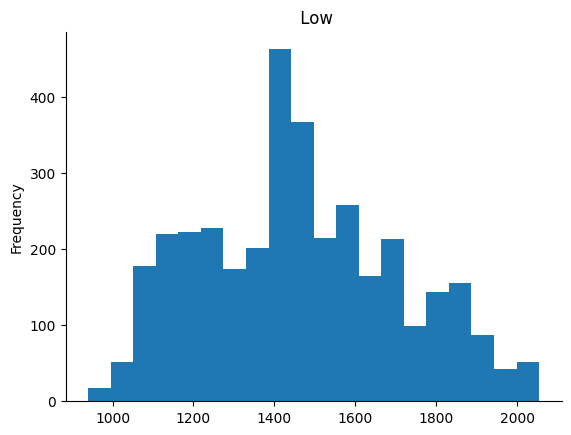

In [18]:
# @title  Low

from matplotlib import pyplot as plt
df[' Low'].plot(kind='hist', bins=20, title=' Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
# prompt: Using dataframe df:

# Calculate the average closing price for each year in the dataframe.
average_closing_prices = df.groupby('Day_of_Week')['is_inter_day_profit'].mean()

# Print the average closing prices for each year.
print(average_closing_prices)

Day_of_Week
0    0.513324
1    0.492918
2    0.515449
3    0.441795
4    0.000000
6    0.367521
Name: is_inter_day_profit, dtype: float64


In [20]:
# prompt: Using dataframe df:

# Calculate the average closing price for each year in the dataframe.
average_closing_prices = df.groupby('Day_of_Week')['is_close_consecutive_days_profit'].mean()

# Print the average closing prices for each year.
print(average_closing_prices)

Day_of_Week
0    0.471248
1    0.447592
2    0.512640
3    0.308555
4    0.500000
6    0.457265
Name: is_close_consecutive_days_profit, dtype: float64


In [21]:
# prompt:

# Calculate the average closing price for each year in the dataframe.
average_closing_prices = df.groupby('month')['is_inter_day_profit'].mean()

# Print the average closing prices for each year.
print(average_closing_prices)

# Calculate the average closing price for each year in the dataframe.
average_closing_prices = df.groupby('month')['is_close_consecutive_days_profit'].mean()

# Print the average closing prices for each year.
print(average_closing_prices)


month
1     0.490964
2     0.454545
3     0.505155
4     0.462151
5     0.412587
6     0.462329
7     0.440397
8     0.457516
9     0.457692
10    0.496552
11    0.479876
12    0.465257
Name: is_inter_day_profit, dtype: float64
month
1     0.469880
2     0.440559
3     0.405498
4     0.462151
5     0.451049
6     0.482877
7     0.413907
8     0.457516
9     0.415385
10    0.424138
11    0.390093
12    0.459215
Name: is_close_consecutive_days_profit, dtype: float64


In [22]:
# prompt:

# Calculate the correlation between the "Open" and "Close" columns for each year in the dataframe.
df_corr = df.groupby('Year')[' Open', ' Close'].corr()

# Print the correlation for each year.
print(df_corr)


                 Open     Close
Year                           
2009  Open   1.000000  0.991486
      Close  0.991486  1.000000
2010  Open   1.000000  0.990614
      Close  0.990614  1.000000
2011  Open   1.000000  0.990256
      Close  0.990256  1.000000
2012  Open   1.000000  0.987020
      Close  0.987020  1.000000
2013  Open   1.000000  0.991800
      Close  0.991800  1.000000
2014  Open   1.000000  0.991809
      Close  0.991809  1.000000
2015  Open   1.000000  0.993987
      Close  0.993987  1.000000
2016  Open   1.000000  0.960225
      Close  0.960225  1.000000
2017  Open   1.000000  0.974999
      Close  0.974999  1.000000
2018  Open   1.000000  0.990012
      Close  0.990012  1.000000
2019  Open   1.000000  0.987998
      Close  0.987998  1.000000
2020  Open   1.000000  0.994866
      Close  0.994866  1.000000
2021  Open   1.000000  0.996818
      Close  0.996818  1.000000
2022  Open   1.000000  0.977627
      Close  0.977627  1.000000
2023  Open   1.000000  0.961380
      Cl

<ipython-input-22-01fa516a09df>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_corr = df.groupby('Year')[' Open', ' Close'].corr()


In [23]:
# prompt:

# Calculate the standard deviation of the closing prices for each year in the dataframe.
std_closing_prices = df.groupby('Year')[' Close'].std()

# Print the standard deviation of the closing prices for each year.
print(std_closing_prices)


Year
2009     56.776105
2010     66.126677
2011    104.002573
2012     54.840098
2013     51.192475
2014     47.598599
2015     85.242385
2016     27.734199
2017     26.425126
2018     65.444656
2019     53.689348
2020    132.632822
2021    117.530018
2022     75.840544
2023     58.779399
2024     20.879315
Name:  Close, dtype: float64
